# Clustering


## Imports

In [ ]:
import numpy as np
# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# evaluation
from sklearn import metrics
# data (artificial)
from sklearn.datasets import make_blobs, make_circles
# data preprocessing
from sklearn.preprocessing import StandardScaler
# clustering algos
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# for jupyter plotting
%matplotlib inline

## Data

Generate 500 points of 2D fake data with 4 clusters.

**Question 1**: What argument controls the dimensionality (i.e. 2D) of the dataset?

In [ ]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

### Check the data

**Question 2**: What are ```X``` and ```y```?


**Question 3**: How do we figure out how many examples we have?


**Question 4**: How do we figure out how many features there are in `X`?

In [ ]:
X.shape

(500, 2)

Use `plt.scatter()` to the data with ground truth labels. Give the first dimension of `X` (i.e. `X[:, 0]`) as the first argument (`x`) and the second dimension of `X` (i.e. `X[:, 1]`) as the second arugment (`y`).

**Question 5**: What color does the cluster in the upper right corner of the plot have?


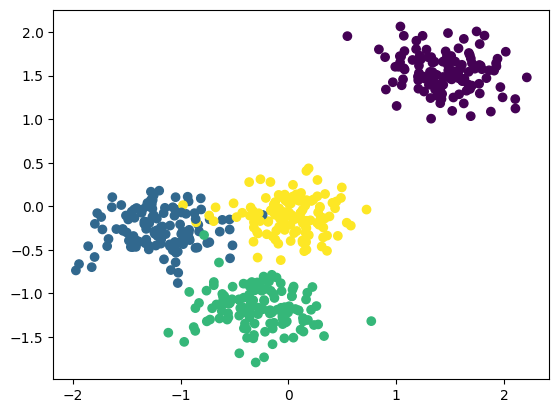

In [ ]:
# Plot the data with ground truth labels
plt.scatter(X[:, 0], X[:, 1], c=y)

## Cluster with k-means

The main arguments to `sklearn.cluster.KMeans()`:

 - ```n_clusters```: *k* in *k*-means.
 - ```n_inits```: number of runs with different initializations
 - ```init```: how to initalize the centroids.
 - ```tol```: tolerance, or threshold ratio. I.e. stopping criterion. Roughly: the algo stops when the centroids move less than `tol`.
 - ```random_state```: seed state of the rng
 - ```verbose```: `True` if you want the fitting of print a lot of stuff. `False` otherwise.

In [ ]:
# initialize kmeans
kmeans = KMeans(n_clusters=4,
                n_init=3,
                init='random',
                tol=1e-4,
                random_state=42,
                verbose=True)

Fit the model to the data.

**Question 6**: What is the last line of the output printed by the fitting?

In [ ]:
# fit to data
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 1335.9004637656326.
Iteration 1, inertia 416.874134737343.
Iteration 2, inertia 241.7126037898717.
Iteration 3, inertia 101.49145371982945.
Iteration 4, inertia 66.60791625950449.
Iteration 5, inertia 64.69191832367008.
Iteration 6, inertia 64.63589563600755.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 687.3362715914685.
Iteration 1, inertia 149.65128333303852.
Iteration 2, inertia 89.89550813883503.
Iteration 3, inertia 65.65276664595257.
Iteration 4, inertia 64.63589563600755.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 176.17779278226993.
Iteration 1, inertia 78.05336077665646.
Iteration 2, inertia 65.46294117416824.
Iteration 3, inertia 64.64211146652471.
Converged at iteration 3: center shift 4.975726162111657e-05 within tolerance 9.999999999999996e-05.


KMeans(init='random', n_clusters=4, n_init=3, random_state=42, verbose=True)

**Question 7**: Where is the model (i.e. what attribute of `kmeans` holds the cluster centers).

Print the model.

In [ ]:
kmeans.cluster_centers_

array([[ 0.0328524 , -0.1120338 ],
       [-0.27709885, -1.17219561],
       [ 1.45785578,  1.53881252],
       [-1.20371678, -0.25345176]])

Plot the clusters labeled by the model and the cluster centroids.

**Question 8**: Copy and paste the image as answer on Canvas.

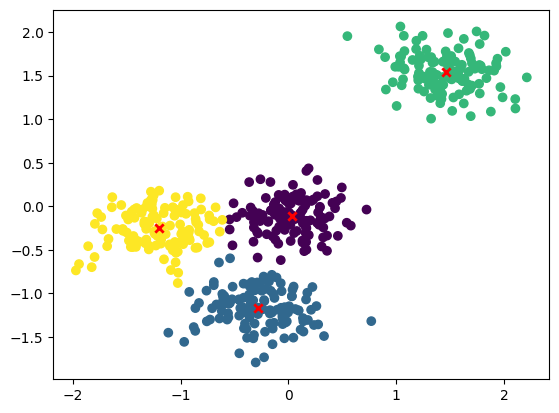

In [ ]:
# Plot the clusters labeled by the model.
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x', linewidth=2)
# Plot the cluster centroids on top with a round marker, red color and linewidth=2.


## Find the best number of clusters

In [ ]:
X, y = make_blobs(n_samples=1500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

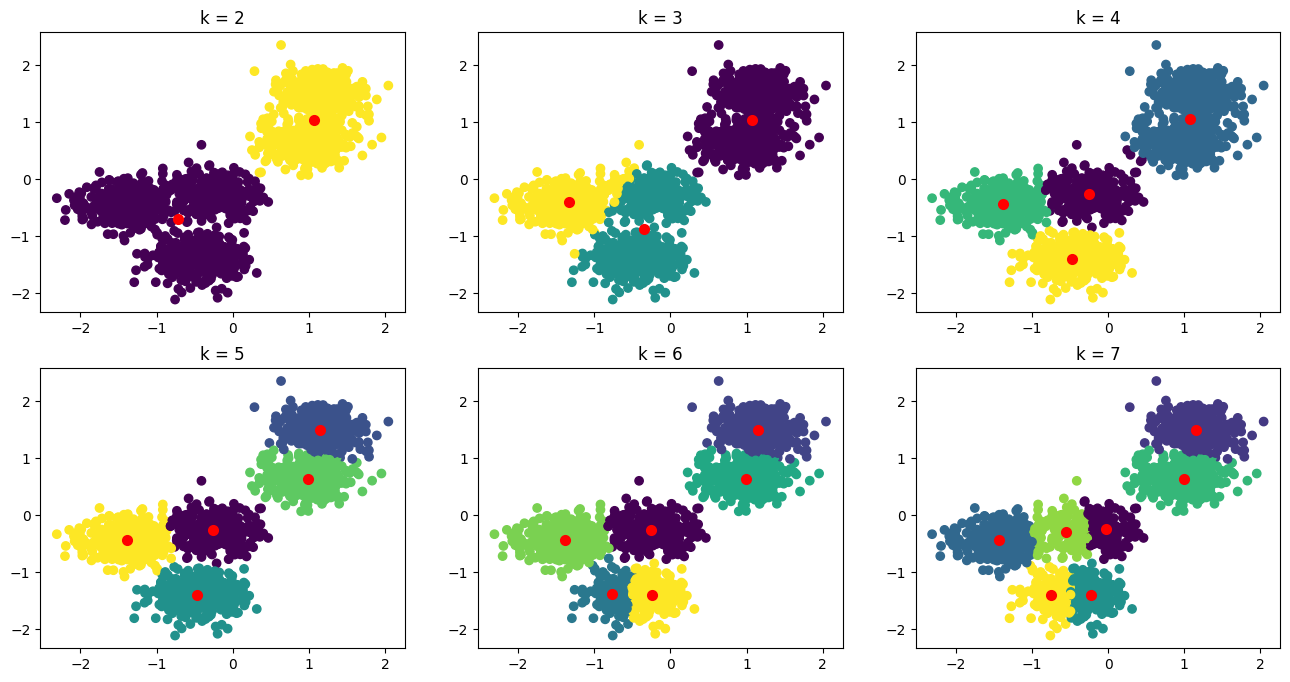

In [44]:
range_k = [2, 3, 4, 5, 6, 7]
s_mean = []

fig = plt.figure(figsize=[16,8])

for i, k in enumerate(range_k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)

    s = metrics.silhouette_samples(X, y_pred)
    s_mean.append(s)

    ax = fig.add_subplot(2,3, i+1)
    ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
    ax.scatter(kmeans.cluster_centers_[:,0],
               kmeans.cluster_centers_[:,1],
               c='r', marker='o', lw=2)
    ax.set_title('k = %d' % k)

In [47]:
s_mean = np.array(s_mean).mean(axis=1)

In [39]:
for i, s in enumerate(s_mean):
  s_mean[i] = s.mean()

In [33]:
for i in range(len(s_mean)):
  s_mean[i] = s_mean[i].mean()

In [49]:
range_k[np.argmax(s_mean)]

2

Text(0.5, 1.0, 'K-means on blob dat')

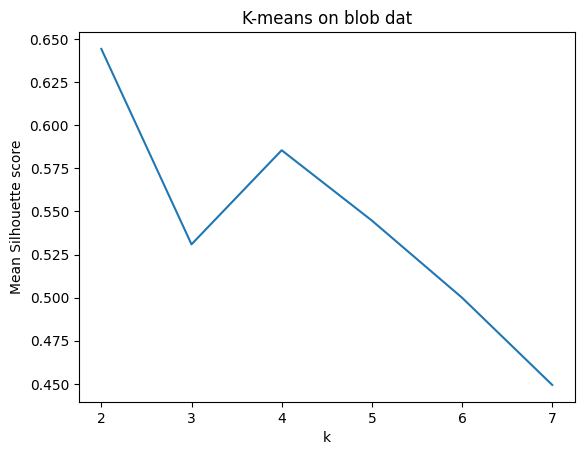

In [55]:
plt.plot(range_k, s_mean)
plt.xlabel('k')
plt.ylabel('Mean Silhouette score')
plt.title('K-means on blob dat')

Plot the mean silhouette scores.

**Question 9**: Copy the image and paste it as an answer on Canvas.

**Question 10**: What is the optimal number of clusters using *k*-means?

## GMM

Find the best number of clusters using a GMM (`GaussianMixture`).

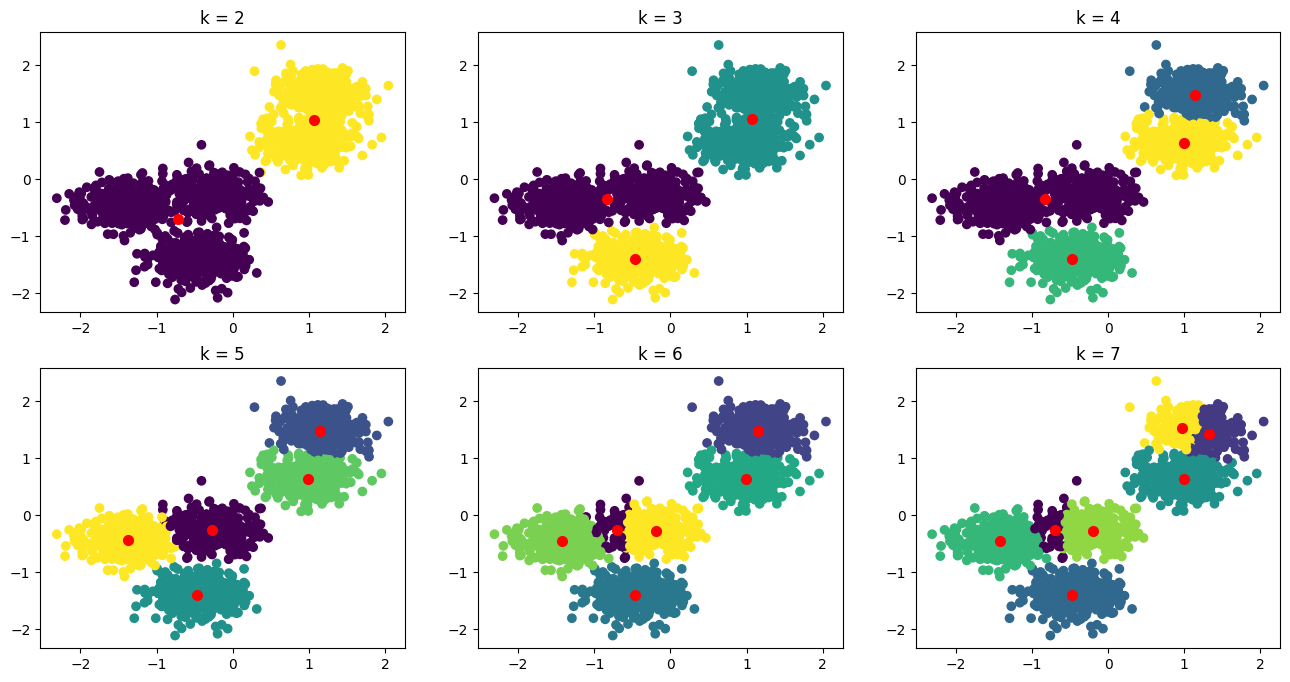

In [57]:
range_k = [2, 3, 4, 5, 6, 7]
s_mean = []

fig = plt.figure(figsize=[16,8])

for i, k in enumerate(range_k):
    gmm = GaussianMixture(n_components=k, random_state=42)
    y_pred = gmm.fit_predict(X)

    s = metrics.silhouette_samples(X, y_pred)
    s_mean.append(s.mean())

    ax = fig.add_subplot(2,3, i+1)
    ax.scatter(X[:,0], X[:,1], c=gmm.predict(X))
    ax.scatter(gmm.means_[:,0],
               gmm.means_[:,1],
               c='r', marker='o', lw=2)
    ax.set_title('k = %d' % k)

Plot the score/fit-metric as a function of the number of clusters.

Text(0.5, 1.0, 'GMM on blob dat')

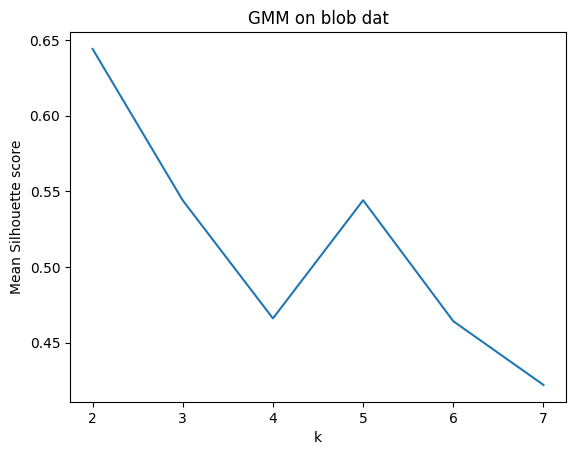

In [58]:
plt.plot(range_k, s_mean)
plt.xlabel('k')
plt.ylabel('Mean Silhouette score')
plt.title('GMM on blob dat')

**Question 11**: What is the optimal number of clusters using GMMs?
## Non-spherical data

In [60]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)
# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

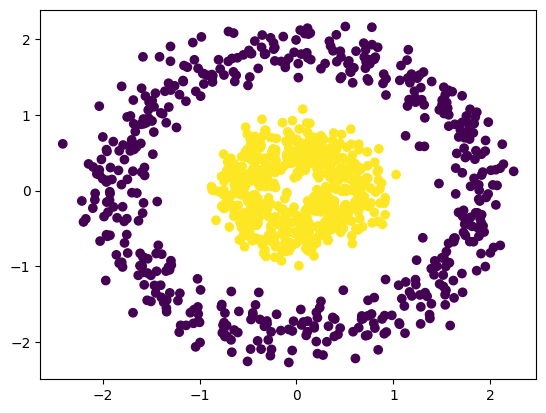

In [61]:
plt.scatter(X[:,0], X[:,1], c=y)

### k-means on non-spherical data

Initialization complete
Iteration 0, inertia 1548.8919790437758.
Iteration 1, inertia 1444.8301390818144.
Iteration 2, inertia 1421.8824945367296.
Iteration 3, inertia 1403.3217297071942.
Iteration 4, inertia 1389.201528845314.
Iteration 5, inertia 1381.3183879501407.
Iteration 6, inertia 1378.605109506977.
Iteration 7, inertia 1377.234634529216.
Iteration 8, inertia 1376.402129127942.
Iteration 9, inertia 1375.6510491510467.
Iteration 10, inertia 1374.9883512239712.
Iteration 11, inertia 1374.7736252625596.
Iteration 12, inertia 1374.7226430630265.
Converged at iteration 12: strict convergence.


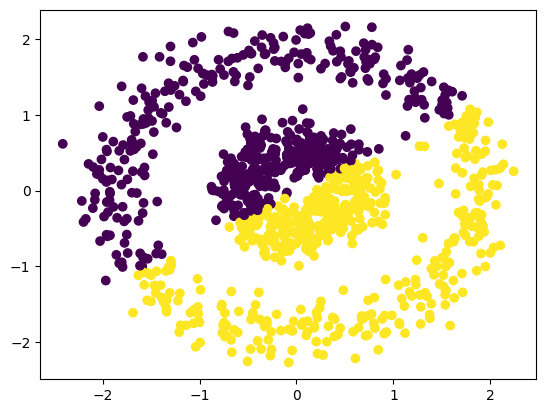

In [62]:
# initialize kmeans
kmeans = KMeans(n_clusters=2,
                n_init=1,
                init='random',
                tol=1e-4,
                random_state=42,
                verbose=True)
# fit to data
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)

**Question 12**: Does *k*-means find good clusters?


Use ```DBSCAN``` on the circles data and plot the figure.

**Question 13**: Does `DBSCAN` perform better than k-means?


In [66]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X)
labels = dbscan.labels_
# 1. Fit the model
# 2. Predict
# 3. Plot clusters colored by predictions

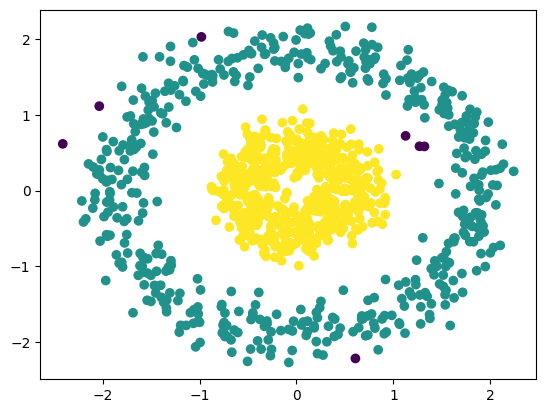

In [68]:
plt.scatter(X[:,0], X[:,1], c=labels)